In [81]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

le = LabelEncoder()

In [82]:
poverty = pd.read_csv('povertyratioallcounties.csv')
groups = poverty['Label (Grouping)']
poverty

,Label (Grouping),"Census Tract 101, Hays County, Texas!!Estimate","Census Tract 101, Hays County, Texas!!Margin of Error","Census Tract 102, Hays County, Texas!!Estimate","Census Tract 102, Hays County, Texas!!Margin of Error","Census Tract 103.02, Hays County, Texas!!Estimate","Census Tract 103.02, Hays County, Texas!!Margin of Error","Census Tract 103.05, Hays County, Texas!!Estimate","Census Tract 103.05, Hays County, Texas!!Margin of Error","Census Tract 103.06, Hays County, Texas!!Estimate",...,"Census Tract 215.17, Williamson County, Texas!!Estimate","Census Tract 215.17, Williamson County, Texas!!Margin of Error","Census Tract 215.18, Williamson County, Texas!!Estimate","Census Tract 215.18, Williamson County, Texas!!Margin of Error","Census Tract 216.01, Williamson County, Texas!!Estimate","Census Tract 216.01, Williamson County, Texas!!Margin of Error","Census Tract 216.02, Williamson County, Texas!!Estimate","Census Tract 216.02, Williamson County, Texas!!Margin of Error","Census Tract 216.03, Williamson County, Texas!!Estimate","Census Tract 216.03, Williamson County, Texas!!Margin of Error"
0,Total:,"2,167",±543,"1,437",±359,"5,329","±1,146","5,209",±710,"4,247",...,"3,466",±741,"3,955",±672,"8,552",±859,"2,717",±456,"2,686",±644
1,Under .50,478,±264,428,±210,841,±569,"1,070",±356,747,...,88,±103,106,±109,313,±201,40,±47,40,±27
2,.50 to .99,364,±284,224,±147,858,±388,645,±316,959,...,0,±14,281,±380,565,±311,226,±182,32,±43
3,1.00 to 1.24,170,±106,58,±69,253,±201,308,±214,75,...,149,±176,43,±60,383,±320,146,±214,213,±233
4,1.25 to 1.49,131,±101,71,±60,188,±167,172,±158,94,...,281,±368,0,±14,149,±132,49,±58,32,±29
5,1.50 to 1.84,102,±83,75,±63,400,±214,802,±288,304,...,0,±14,92,±98,582,±480,118,±94,13,±14
6,1.85 to 1.99,16,±26,9,±14,53,±62,315,±260,167,...,120,±178,122,±187,188,±228,35,±56,92,±71
7,2.00 and over,906,±258,572,±261,"2,736",±749,"1,897",±535,"1,901",...,"2,828",±681,"3,311",±704,"6,372",±961,"2,103",±427,"2,264",±596


## Cleaning

In [83]:
poverty_cleaned = poverty.replace('±', '', regex=True)
poverty_cleaned = poverty_cleaned.apply(pd.to_numeric, errors='ignore')

for col in poverty_cleaned.columns[1:]:
    if col != 'Label (Grouping)':  # Skip the first column if it contains non-numeric data
        poverty_cleaned[col] = poverty_cleaned[col].replace({',': '', '±': ''}, regex=True).astype(int)

poverty_cleaned


,Label (Grouping),"Census Tract 101, Hays County, Texas!!Estimate","Census Tract 101, Hays County, Texas!!Margin of Error","Census Tract 102, Hays County, Texas!!Estimate","Census Tract 102, Hays County, Texas!!Margin of Error","Census Tract 103.02, Hays County, Texas!!Estimate","Census Tract 103.02, Hays County, Texas!!Margin of Error","Census Tract 103.05, Hays County, Texas!!Estimate","Census Tract 103.05, Hays County, Texas!!Margin of Error","Census Tract 103.06, Hays County, Texas!!Estimate",...,"Census Tract 215.17, Williamson County, Texas!!Estimate","Census Tract 215.17, Williamson County, Texas!!Margin of Error","Census Tract 215.18, Williamson County, Texas!!Estimate","Census Tract 215.18, Williamson County, Texas!!Margin of Error","Census Tract 216.01, Williamson County, Texas!!Estimate","Census Tract 216.01, Williamson County, Texas!!Margin of Error","Census Tract 216.02, Williamson County, Texas!!Estimate","Census Tract 216.02, Williamson County, Texas!!Margin of Error","Census Tract 216.03, Williamson County, Texas!!Estimate","Census Tract 216.03, Williamson County, Texas!!Margin of Error"
0,Total:,2167,543,1437,359,5329,1146,5209,710,4247,...,3466,741,3955,672,8552,859,2717,456,2686,644
1,Under .50,478,264,428,210,841,569,1070,356,747,...,88,103,106,109,313,201,40,47,40,27
2,.50 to .99,364,284,224,147,858,388,645,316,959,...,0,14,281,380,565,311,226,182,32,43
3,1.00 to 1.24,170,106,58,69,253,201,308,214,75,...,149,176,43,60,383,320,146,214,213,233
4,1.25 to 1.49,131,101,71,60,188,167,172,158,94,...,281,368,0,14,149,132,49,58,32,29
5,1.50 to 1.84,102,83,75,63,400,214,802,288,304,...,0,14,92,98,582,480,118,94,13,14
6,1.85 to 1.99,16,26,9,14,53,62,315,260,167,...,120,178,122,187,188,228,35,56,92,71
7,2.00 and over,906,258,572,261,2736,749,1897,535,1901,...,2828,681,3311,704,6372,961,2103,427,2264,596


In [84]:
total_row = poverty_cleaned.iloc[0]

percentage_df = poverty_cleaned.drop('Label (Grouping)', axis=1).div(total_row.drop('Label (Grouping)')).mul(100)

percentage_df.insert(0, 'Label (Grouping)', poverty_cleaned['Label (Grouping)'])
percentage_df['Label (Grouping)'] = groups
percentage_df

/var/folders/fg/r_yjw33s24zfqzv01czrnj_00000gn/T/ipykernel_16601/4018776624.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  percentage_df.insert(0, 'Label (Grouping)', poverty_cleaned['Label (Grouping)'])


,Label (Grouping),"Census Tract 101, Hays County, Texas!!Estimate","Census Tract 101, Hays County, Texas!!Margin of Error","Census Tract 102, Hays County, Texas!!Estimate","Census Tract 102, Hays County, Texas!!Margin of Error","Census Tract 103.02, Hays County, Texas!!Estimate","Census Tract 103.02, Hays County, Texas!!Margin of Error","Census Tract 103.05, Hays County, Texas!!Estimate","Census Tract 103.05, Hays County, Texas!!Margin of Error","Census Tract 103.06, Hays County, Texas!!Estimate",...,"Census Tract 215.17, Williamson County, Texas!!Estimate","Census Tract 215.17, Williamson County, Texas!!Margin of Error","Census Tract 215.18, Williamson County, Texas!!Estimate","Census Tract 215.18, Williamson County, Texas!!Margin of Error","Census Tract 216.01, Williamson County, Texas!!Estimate","Census Tract 216.01, Williamson County, Texas!!Margin of Error","Census Tract 216.02, Williamson County, Texas!!Estimate","Census Tract 216.02, Williamson County, Texas!!Margin of Error","Census Tract 216.03, Williamson County, Texas!!Estimate","Census Tract 216.03, Williamson County, Texas!!Margin of Error"
0,Total:,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
1,Under .50,22.058145,48.618785,29.784273,58.495822,15.781573,49.65096,20.541371,50.140845,17.588886,...,2.53895,13.900135,2.680152,16.220238,3.659963,23.399302,1.472212,10.307018,1.489203,4.192547
2,.50 to .99,16.797416,52.302026,15.588031,40.947075,16.100582,33.856894,12.382415,44.507042,22.580645,...,0.0,1.889339,7.10493,56.547619,6.606642,36.204889,8.317998,39.912281,1.191363,6.677019
3,1.00 to 1.24,7.844947,19.521179,4.036186,19.220056,4.747607,17.539267,5.912843,30.140845,1.765952,...,4.298904,23.751687,1.087231,8.928571,4.478485,37.252619,5.373574,46.929825,7.930007,36.180124
4,1.25 to 1.49,6.045224,18.600368,4.940849,16.713092,3.527866,14.572426,3.301977,22.253521,2.213327,...,8.107328,49.662618,0.0,2.083333,1.742283,15.366705,1.80346,12.719298,1.191363,4.503106
5,1.50 to 1.84,4.706968,15.285451,5.219207,17.548747,7.506099,18.673647,15.396429,40.56338,7.157994,...,0.0,1.889339,2.326169,14.583333,6.805426,55.878929,4.343025,20.614035,0.483991,2.173913
6,1.85 to 1.99,0.738348,4.788214,0.626305,3.899721,0.994558,5.410122,6.047226,36.619718,3.932187,...,3.462204,24.021592,3.084703,27.827381,2.198316,26.542491,1.288185,12.280702,3.425168,11.024845
7,2.00 and over,41.808952,47.513812,39.80515,72.70195,51.341715,65.357766,36.417739,75.352113,44.761008,...,81.592614,91.902834,83.716814,104.761905,74.508887,111.874272,77.401546,93.640351,84.288905,92.546584


In [85]:

transposed_df = percentage_df.transpose()
transposed_df.columns = transposed_df.iloc[0]  
transposed_df = transposed_df.drop(transposed_df.index[0])  

transposed_df


Label (Grouping),Total:,Under .50,.50 to .99,1.00 to 1.24,1.25 to 1.49,1.50 to 1.84,1.85 to 1.99,2.00 and over
"Census Tract 101, Hays County, Texas!!Estimate",100.0,22.058145,16.797416,7.844947,6.045224,4.706968,0.738348,41.808952
"Census Tract 101, Hays County, Texas!!Margin of Error",100.0,48.618785,52.302026,19.521179,18.600368,15.285451,4.788214,47.513812
"Census Tract 102, Hays County, Texas!!Estimate",100.0,29.784273,15.588031,4.036186,4.940849,5.219207,0.626305,39.80515
"Census Tract 102, Hays County, Texas!!Margin of Error",100.0,58.495822,40.947075,19.220056,16.713092,17.548747,3.899721,72.70195
"Census Tract 103.02, Hays County, Texas!!Estimate",100.0,15.781573,16.100582,4.747607,3.527866,7.506099,0.994558,51.341715
...,...,...,...,...,...,...,...,...
"Census Tract 216.01, Williamson County, Texas!!Margin of Error",100.0,23.399302,36.204889,37.252619,15.366705,55.878929,26.542491,111.874272
"Census Tract 216.02, Williamson County, Texas!!Estimate",100.0,1.472212,8.317998,5.373574,1.80346,4.343025,1.288185,77.401546
"Census Tract 216.02, Williamson County, Texas!!Margin of Error",100.0,10.307018,39.912281,46.929825,12.719298,20.614035,12.280702,93.640351
"Census Tract 216.03, Williamson County, Texas!!Estimate",100.0,1.489203,1.191363,7.930007,1.191363,0.483991,3.425168,84.288905


In [86]:
transposed_df.reset_index(inplace=True)
transposed_df['Census Tract'] = transposed_df['index'].str.extract(r'(\d+\.*\d*)')
transposed_df = transposed_df.drop(['index'], axis=1)
transposed_df



Label (Grouping),Total:,Under .50,.50 to .99,1.00 to 1.24,1.25 to 1.49,1.50 to 1.84,1.85 to 1.99,2.00 and over,Census Tract
0,100.0,22.058145,16.797416,7.844947,6.045224,4.706968,0.738348,41.808952,101
1,100.0,48.618785,52.302026,19.521179,18.600368,15.285451,4.788214,47.513812,101
2,100.0,29.784273,15.588031,4.036186,4.940849,5.219207,0.626305,39.80515,102
3,100.0,58.495822,40.947075,19.220056,16.713092,17.548747,3.899721,72.70195,102
4,100.0,15.781573,16.100582,4.747607,3.527866,7.506099,0.994558,51.341715,103.02
...,...,...,...,...,...,...,...,...,...
937,100.0,23.399302,36.204889,37.252619,15.366705,55.878929,26.542491,111.874272,216.01
938,100.0,1.472212,8.317998,5.373574,1.80346,4.343025,1.288185,77.401546,216.02
939,100.0,10.307018,39.912281,46.929825,12.719298,20.614035,12.280702,93.640351,216.02
940,100.0,1.489203,1.191363,7.930007,1.191363,0.483991,3.425168,84.288905,216.03


In [90]:
transposed_df.isnull().sum()

Label (Grouping)
Total:               0
    Under .50        0
    .50 to .99       0
    1.00 to 1.24     0
    1.25 to 1.49     0
    1.50 to 1.84     0
    1.85 to 1.99     0
    2.00 and over    0
Census Tract         0
dtype: int64

In [91]:
transposed_df.dropna(inplace=True)
transposed_df.isnull().sum()

Label (Grouping)
Total:               0
    Under .50        0
    .50 to .99       0
    1.00 to 1.24     0
    1.25 to 1.49     0
    1.50 to 1.84     0
    1.85 to 1.99     0
    2.00 and over    0
Census Tract         0
dtype: int64

In [27]:
df = pd.read_csv('Crime_Reports_2018.csv')
df.columns


Index(['Incident Number', 'Highest Offense Description',
       'Highest Offense Code', 'Family Violence', 'Occurred Date Time',
       'Occurred Date', 'Occurred Time', 'Report Date Time', 'Report Date',
       'Report Time', 'Location Type', 'Address', 'Zip Code',
       'Council District', 'APD Sector', 'APD District', 'PRA', 'Census Tract',
       'Clearance Status', 'Clearance Date', 'UCR Category',
       'Category Description', 'X-coordinate', 'Y-coordinate', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [94]:
df['Location Type'] = le.fit_transform(df['Location Type'])
df['APD Sector'] = le.fit_transform(df['APD Sector'])
df['APD District'] = le.fit_transform(df['APD District'])
df['PRA'] = le.fit_transform(df['PRA'])
df['Family Violence'] = le.fit_transform(df['Family Violence'])

 
df = df[['Highest Offense Code', 'Family Violence', 'Location Type', 'APD Sector', 'APD District', 'PRA', 'Census Tract','Clearance Status']]
df


,Highest Offense Code,Family Violence,Location Type,APD Sector,APD District,PRA,Census Tract,Clearance Status
0,408,0,35,11,7,168,400.00,NaN
1,1803,0,25,4,5,226,1.00,C
2,3400,0,35,2,7,551,329.00,N
3,900,0,25,11,2,197,21.12,N
4,2400,0,25,4,1,266,12.00,N
...,...,...,...,...,...,...,...,...
98050,4022,0,35,2,2,90,342.00,N
98051,4022,0,35,7,6,145,416.00,N
98052,4022,0,31,5,4,293,22.14,N
98053,4022,0,35,7,1,140,407.00,N


In [95]:
transposed_df['Census Tract'] = transposed_df['Census Tract'].astype(float)
merged_df = pd.merge(transposed_df, df, on='Census Tract')
merged_df.columns = merged_df.columns.str.strip() 
merged_df

,Total:,Under .50,.50 to .99,1.00 to 1.24,1.25 to 1.49,1.50 to 1.84,1.85 to 1.99,2.00 and over,Census Tract,Highest Offense Code,Family Violence,Location Type,APD Sector,APD District,PRA,Clearance Status
0,100.0,0.253068,3.884601,1.024927,2.151082,0.620018,0.025307,92.040997,109.12,4022,0,35,6,7,568,N
1,100.0,0.253068,3.884601,1.024927,2.151082,0.620018,0.025307,92.040997,109.12,1400,0,35,6,7,568,N
2,100.0,0.253068,3.884601,1.024927,2.151082,0.620018,0.025307,92.040997,109.12,402,0,12,6,7,568,N
3,100.0,0.253068,3.884601,1.024927,2.151082,0.620018,0.025307,92.040997,109.12,402,1,32,6,7,568,C
4,100.0,0.253068,3.884601,1.024927,2.151082,0.620018,0.025307,92.040997,109.12,600,0,12,6,7,558,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126475,100.0,7.358491,4.056604,3.962264,17.45283,13.113208,3.396226,99.433962,205.17,600,0,12,2,4,0,N
126476,100.0,7.358491,4.056604,3.962264,17.45283,13.113208,3.396226,99.433962,205.17,2703,0,24,1,8,0,N
126477,100.0,7.358491,4.056604,3.962264,17.45283,13.113208,3.396226,99.433962,205.17,900,1,35,2,4,437,C
126478,100.0,2.53895,0.0,4.298904,8.107328,0.0,3.462204,81.592614,215.17,2902,0,35,1,8,569,N


In [97]:
merged_df.isnull().sum()

Total:                      0
Under .50                   0
.50 to .99                  0
1.00 to 1.24                0
1.25 to 1.49                0
1.50 to 1.84                0
1.85 to 1.99                0
2.00 and over               0
Census Tract                0
Highest Offense Code        0
Family Violence             0
Location Type               0
APD Sector                  0
APD District                0
PRA                         0
Clearance Status        11888
dtype: int64

In [98]:
nan_rows = merged_df[merged_df['Clearance Status'].isnull()] #keeping nan rows to predict
nan_rows


,Total:,Under .50,.50 to .99,1.00 to 1.24,1.25 to 1.49,1.50 to 1.84,1.85 to 1.99,2.00 and over,Census Tract,Highest Offense Code,Family Violence,Location Type,APD Sector,APD District,PRA,Clearance Status
10,100.0,0.409191,7.491344,0.0,0.0,12.669185,2.943028,76.487252,109.13,3442,0,25,1,8,568,NaN
12,100.0,4.560623,41.824249,2.224694,2.224694,69.299221,50.389321,105.67297,109.13,3442,0,25,1,8,568,NaN
18,100.0,1.634665,2.38713,4.436949,4.436949,3.425013,5.656461,78.022833,2.05,3400,0,35,11,3,191,NaN
20,100.0,1.634665,2.38713,4.436949,4.436949,3.425013,5.656461,78.022833,2.05,3299,0,25,11,3,191,NaN
21,100.0,1.634665,2.38713,4.436949,4.436949,3.425013,5.656461,78.022833,2.05,3400,0,35,11,3,191,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126419,100.0,3.125,50.625,40.78125,3.125,15.78125,3.125,120.9375,205.16,3401,0,33,2,4,437,NaN
126423,100.0,3.125,50.625,40.78125,3.125,15.78125,3.125,120.9375,205.16,3400,0,35,2,4,437,NaN
126432,100.0,3.125,50.625,40.78125,3.125,15.78125,3.125,120.9375,205.16,1199,0,18,2,4,437,NaN
126440,100.0,3.125,50.625,40.78125,3.125,15.78125,3.125,120.9375,205.16,3400,0,35,2,4,437,NaN


In [99]:
merged_df.dropna(inplace=True)

merged_df.isnull().any(axis=1).sum()



0

In [34]:

X = merged_df[['Under .50', '.50 to .99', '1.00 to 1.24', '1.25 to 1.49', '1.50 to 1.84', '1.85 to 1.99', '2.00 and over']]
y = merged_df['Clearance Status']

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print(classification_report(y_test, y_pred))



Accuracy: 0.76
              precision    recall  f1-score   support

           C       0.41      0.00      0.00      5241
           N       0.76      1.00      0.86     17444
           O       0.00      0.00      0.00       234

    accuracy                           0.76     22919
   macro avg       0.39      0.33      0.29     22919
weighted avg       0.67      0.76      0.66     22919



In [35]:
merged_df.isnull().sum()

Total:                  0
Under .50               0
.50 to .99              0
1.00 to 1.24            0
1.25 to 1.49            0
1.50 to 1.84            0
1.85 to 1.99            0
2.00 and over           0
Census Tract            0
Highest Offense Code    0
Family Violence         0
Location Type           0
APD Sector              0
APD District            0
PRA                     0
Clearance Status        0
dtype: int64

In [100]:

X = merged_df[['Under .50', '.50 to .99', '1.00 to 1.24', '1.25 to 1.49', '1.50 to 1.84', '1.85 to 1.99', '2.00 and over', 'Census Tract',
       'Highest Offense Code', 'Family Violence', 'Location Type',
       'APD Sector', 'APD District', 'PRA']]
y = merged_df['Clearance Status']

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf2 = DecisionTreeClassifier(random_state=42)
clf2.fit(X_train, y_train)

y_pred = clf2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.87
              precision    recall  f1-score   support

           C       0.72      0.75      0.73      5241
           N       0.92      0.91      0.92     17444
           O       0.30      0.18      0.22       234

    accuracy                           0.87     22919
   macro avg       0.65      0.61      0.62     22919
weighted avg       0.87      0.87      0.87     22919



In [102]:
from sklearn.metrics import  classification_report

# Print classification report
print(classification_report(y_test, y_pred))

feature_importance = clf.feature_importances_

feature_importance_dict = dict(zip(X.columns, feature_importance))

sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print most important features
print("Most important features:")
for feature, importance in sorted_features:
    print(f"{feature}: {importance}")

              precision    recall  f1-score   support

           C       0.41      0.00      0.00      5241
           N       0.76      1.00      0.86     17444
           O       0.00      0.00      0.00       234

    accuracy                           0.76     22919
   macro avg       0.39      0.33      0.29     22919
weighted avg       0.67      0.76      0.66     22919

Most important features:
2.00 and over: 0.28907945490727227
1.85 to 1.99: 0.20595491357153747
1.50 to 1.84: 0.12254256390064819
Under .50: 0.1221517072546952
.50 to .99: 0.10287349458243882
1.00 to 1.24: 0.09756751549754568
1.25 to 1.49: 0.05983035028586233


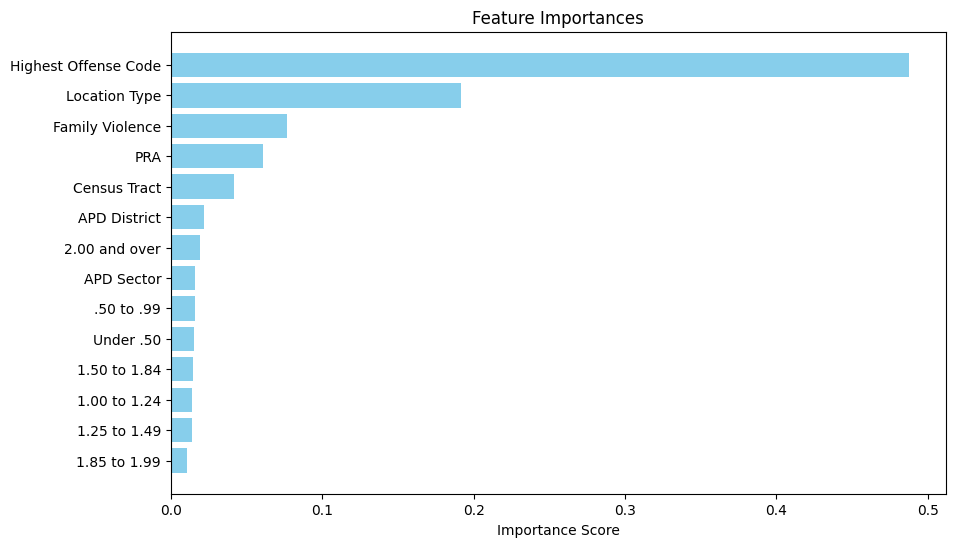

In [103]:

features = [
    'Highest Offense Code', 'Location Type', 'Family Violence', 'PRA',
    'Census Tract', 'APD District', '2.00 and over', 'APD Sector',
    '.50 to .99', 'Under .50', '1.50 to 1.84', '1.00 to 1.24',
    '1.25 to 1.49', '1.85 to 1.99'
]

importances = [
    0.4875042246029697, 0.1916531903953295, 0.07646991902720555,
    0.06111336072539989, 0.04140957147484979, 0.021688775676249366,
    0.01925878717927322, 0.016229017012365364, 0.01584228838211768,
    0.015512316353029978, 0.014807382695514456, 0.01399793303242836,
    0.013804244708687203, 0.01070898873458002
]

plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  
plt.show()


In [43]:
categories = ['Under .50', '.50 to .99', '1.00 to 1.24', '1.25 to 1.49', '1.50 to 1.84', '1.85 to 1.99', '2.00 and over']

clearance_sum = merged_df.groupby('Clearance Status')[categories].sum()

column_total = clearance_sum.sum()  # Get total sum of each column
percentages = (clearance_sum / column_total) * 100  # Calculate percentages

percentages


,Under .50,.50 to .99,1.00 to 1.24,1.25 to 1.49,1.50 to 1.84,1.85 to 1.99,2.00 and over
Clearance Status,,,,,,,
C,24.041900,24.508384,24.770529,24.345347,23.846340,24.354602,22.429941
N,74.550526,74.042625,73.561531,74.015885,74.623209,73.574070,76.495370
O,1.407574,1.448991,1.667940,1.638768,1.530451,2.071328,1.074689


In [104]:
categories = ['Under .50', '.50 to .99', '1.00 to 1.24', '1.25 to 1.49', '1.50 to 1.84', '1.85 to 1.99', '2.00 and over']

clearance_sum = X_null.groupby('Clearance Status')[categories].sum()

column_total = clearance_sum.sum()  # Get total sum of each column
percentages = (clearance_sum / column_total) * 100  # Calculate percentages

percentages

,Under .50,.50 to .99,1.00 to 1.24,1.25 to 1.49,1.50 to 1.84,1.85 to 1.99,2.00 and over
Clearance Status,,,,,,,
C,17.183814,17.140239,17.710772,18.026779,16.562991,18.288187,15.513217
N,82.392941,82.470097,81.836066,81.502890,82.933445,81.219688,84.115718
O,0.423245,0.389665,0.453162,0.470331,0.503565,0.492125,0.371065


## Predicting Nan Clearance using CART

In [44]:
nan_rows

,Total:,Under .50,.50 to .99,1.00 to 1.24,1.25 to 1.49,1.50 to 1.84,1.85 to 1.99,2.00 and over,Census Tract,Highest Offense Code,Family Violence,Location Type,APD Sector,APD District,PRA,Clearance Status
10,100.0,0.409191,7.491344,0.000000,0.000000,12.669185,2.943028,76.487252,109.13,3442,0,25,1,8,568,NaN
12,100.0,4.560623,41.824249,2.224694,2.224694,69.299221,50.389321,105.672970,109.13,3442,0,25,1,8,568,NaN
18,100.0,1.634665,2.387130,4.436949,4.436949,3.425013,5.656461,78.022833,2.05,3400,0,35,11,3,191,NaN
20,100.0,1.634665,2.387130,4.436949,4.436949,3.425013,5.656461,78.022833,2.05,3299,0,25,11,3,191,NaN
21,100.0,1.634665,2.387130,4.436949,4.436949,3.425013,5.656461,78.022833,2.05,3400,0,35,11,3,191,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126419,100.0,3.125000,50.625000,40.781250,3.125000,15.781250,3.125000,120.937500,205.16,3401,0,33,2,4,437,NaN
126423,100.0,3.125000,50.625000,40.781250,3.125000,15.781250,3.125000,120.937500,205.16,3400,0,35,2,4,437,NaN
126432,100.0,3.125000,50.625000,40.781250,3.125000,15.781250,3.125000,120.937500,205.16,1199,0,18,2,4,437,NaN
126440,100.0,3.125000,50.625000,40.781250,3.125000,15.781250,3.125000,120.937500,205.16,3400,0,35,2,4,437,NaN


In [64]:

X_null = nan_rows[X.columns]
y_pred_null = clf2.predict(X_null)
X_null['Clearance Status'] = y_pred_null
X_null


/var/folders/fg/r_yjw33s24zfqzv01czrnj_00000gn/T/ipykernel_16601/3323581888.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_null['Clearance Status'] = y_pred_null


,Under .50,.50 to .99,1.00 to 1.24,1.25 to 1.49,1.50 to 1.84,1.85 to 1.99,2.00 and over,Census Tract,Highest Offense Code,Family Violence,Location Type,APD Sector,APD District,PRA,Clearance Status
10,0.409191,7.491344,0.000000,0.000000,12.669185,2.943028,76.487252,109.13,3442,0,25,1,8,568,C
12,4.560623,41.824249,2.224694,2.224694,69.299221,50.389321,105.672970,109.13,3442,0,25,1,8,568,C
18,1.634665,2.387130,4.436949,4.436949,3.425013,5.656461,78.022833,2.05,3400,0,35,11,3,191,N
20,1.634665,2.387130,4.436949,4.436949,3.425013,5.656461,78.022833,2.05,3299,0,25,11,3,191,N
21,1.634665,2.387130,4.436949,4.436949,3.425013,5.656461,78.022833,2.05,3400,0,35,11,3,191,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126419,3.125000,50.625000,40.781250,3.125000,15.781250,3.125000,120.937500,205.16,3401,0,33,2,4,437,N
126423,3.125000,50.625000,40.781250,3.125000,15.781250,3.125000,120.937500,205.16,3400,0,35,2,4,437,N
126432,3.125000,50.625000,40.781250,3.125000,15.781250,3.125000,120.937500,205.16,1199,0,18,2,4,437,N
126440,3.125000,50.625000,40.781250,3.125000,15.781250,3.125000,120.937500,205.16,3400,0,35,2,4,437,N
